# Quantifying Data Distortion

Teng-Jui Lin

- Created: 2023-05-28
- Edited: 2024-06-18

In [1]:
from bar_constants import *
set_save_fig_rc()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Control Experiment Bar Graphs

### Control 1

(0.0, 60.0)

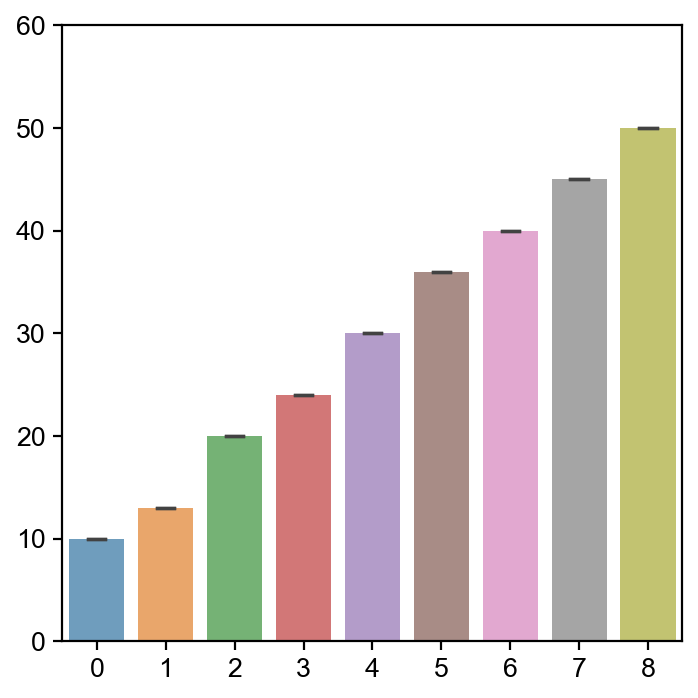

In [2]:
bar_df = pd.DataFrame(np.hstack([
    10 + np.zeros([SAMPLE_SIZE, 1]), 
    13 + np.zeros([SAMPLE_SIZE, 1]), 
    20 + np.zeros([SAMPLE_SIZE, 1]), 
    24 + np.zeros([SAMPLE_SIZE, 1]), 
    30 + np.zeros([SAMPLE_SIZE, 1]), 
    36 + np.zeros([SAMPLE_SIZE, 1]), 
    40 + np.zeros([SAMPLE_SIZE, 1]), 
    45 + np.zeros([SAMPLE_SIZE, 1]), 
    50 + np.zeros([SAMPLE_SIZE, 1]),
]))

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    bar_df,
    errorbar=BAR_ERRORBAR,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    ax=ax,
)
# ax.set_box_aspect(2)
ax.set_ylim(0, 60)

In [3]:
def get_size_of_effect(series):
    # get permutations of all items as 2d array
    comb_arr = itertools.permutations(series, 2)
    comb_arr = np.array(list(comb_arr))
    # calculate size of effect for each permutation as series
    effect = np.diff(comb_arr).reshape(-1) / comb_arr[:, 0]
    effect = pd.Series(effect)
    return effect


def _get_lie_factor(viz_series, val_series):
    return get_size_of_effect(viz_series) / get_size_of_effect(val_series)


def get_lie_factor(viz_series, val_series):
    return viz_series / val_series

In [4]:
control1_val_series = pd.Series(np.array([10, 13, 20, 24, 30, 36, 40, 45, 50]))
control1_val_series.name = 'Data Value'
control1_val_series

0    10
1    13
2    20
3    24
4    30
5    36
6    40
7    45
8    50
Name: Data Value, dtype: int64

In [5]:
control1_viz_df = pd.read_csv(os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'control', 'control_fig1.csv'), header=None, index_col=0)
control1_viz_df = control1_viz_df.reset_index(drop=True)
control1_viz_series = control1_viz_df.iloc[:, 0]
control1_viz_series.name = 'Visual Value'
control1_viz_series

0     9.868491
1    12.887194
2    19.898377
3    23.890856
4    29.928263
5    35.868292
6    39.860771
7    44.924403
8    49.890657
Name: Visual Value, dtype: float64

In [6]:
lie_factor_df = _get_lie_factor(control1_viz_series, control1_val_series)

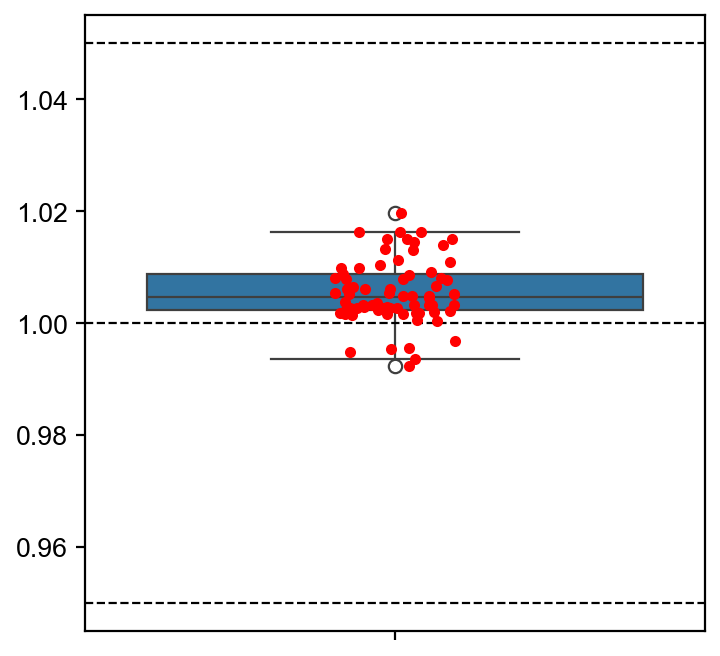

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(
    lie_factor_df,
    ax=ax,
    log_scale=False,
)
sns.stripplot(
    lie_factor_df,
    ax=ax,
    color='r',
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)

(-5.0, 1.5)

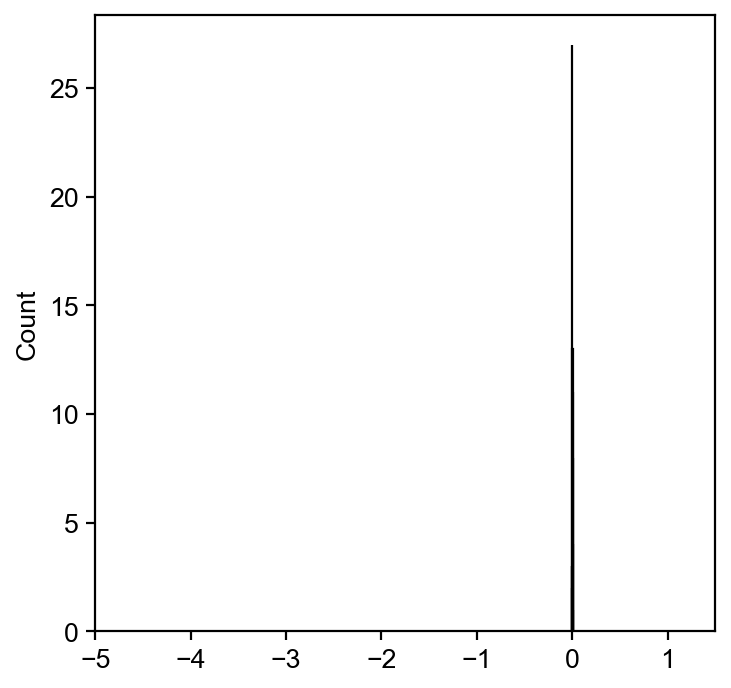

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    np.log10(lie_factor_df),
    ax=ax,
)
ax.set_xlim(-5, 1.5)

### Control 2

(0.0, 140.0)

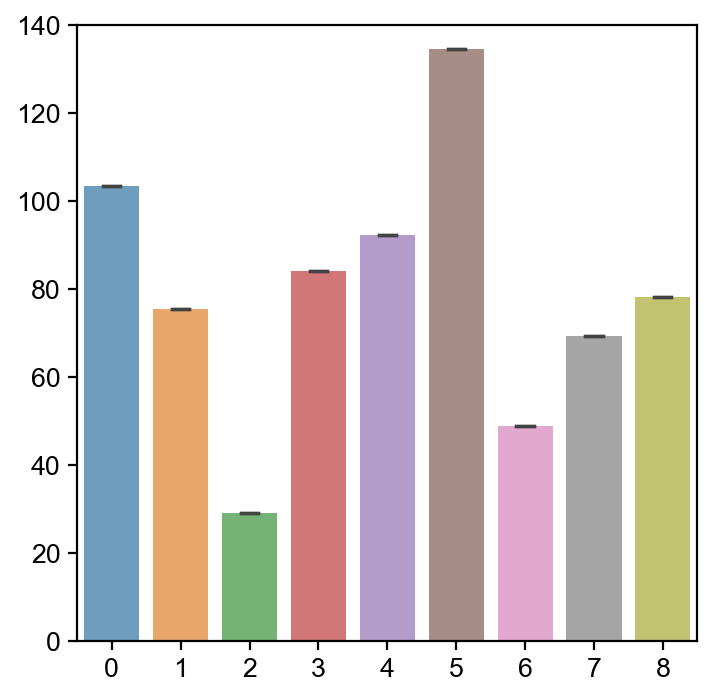

In [9]:
bar_df = pd.DataFrame(np.hstack([
    103.4 + np.zeros([SAMPLE_SIZE, 1]), 
    75.6 + np.zeros([SAMPLE_SIZE, 1]), 
    29.2 + np.zeros([SAMPLE_SIZE, 1]), 
    84.1 + np.zeros([SAMPLE_SIZE, 1]), 
    92.3 + np.zeros([SAMPLE_SIZE, 1]), 
    134.6 + np.zeros([SAMPLE_SIZE, 1]), 
    48.9 + np.zeros([SAMPLE_SIZE, 1]), 
    69.3 + np.zeros([SAMPLE_SIZE, 1]), 
    78.3 + np.zeros([SAMPLE_SIZE, 1]),
]))

fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    bar_df,
    errorbar=BAR_ERRORBAR,
    capsize=BAR_CAPSIZE,
    linewidth=BAR_LINEWIDTH,
    edgecolor=BAR_EDGECOLOR,
    alpha=BAR_ALPHA,
    width=BAR_WIDTH,
    ax=ax,
)
# ax.set_box_aspect(2)
ax.set_ylim(0, 140)

In [10]:
control2_val_series = pd.Series(np.array([103.4, 75.6, 29.2, 84.1, 92.3, 134.6, 48.9, 69.3, 78.3]))
control2_val_series.name = 'Data Value'
control2_val_series

0    103.4
1     75.6
2     29.2
3     84.1
4     92.3
5    134.6
6     48.9
7     69.3
8     78.3
Name: Data Value, dtype: float64

In [11]:
control2_viz_df = pd.read_csv(os.path.join(DATA_DIR, MISUSED_BAR_DIR, 'control', 'control_fig2.csv'), header=None, index_col=0)
control2_viz_df = control2_viz_df.reset_index(drop=True)
control2_viz_series = control2_viz_df.iloc[:, 0]
control2_viz_series.name = 'Visual Value'
control2_viz_series

0    103.233107
1     75.285755
2     28.934049
3     83.919896
4     92.099609
5    134.361458
6     48.701688
7     68.923756
8     78.012326
Name: Visual Value, dtype: float64

In [12]:
lie_factor_df = _get_lie_factor(control2_viz_series, control2_val_series)

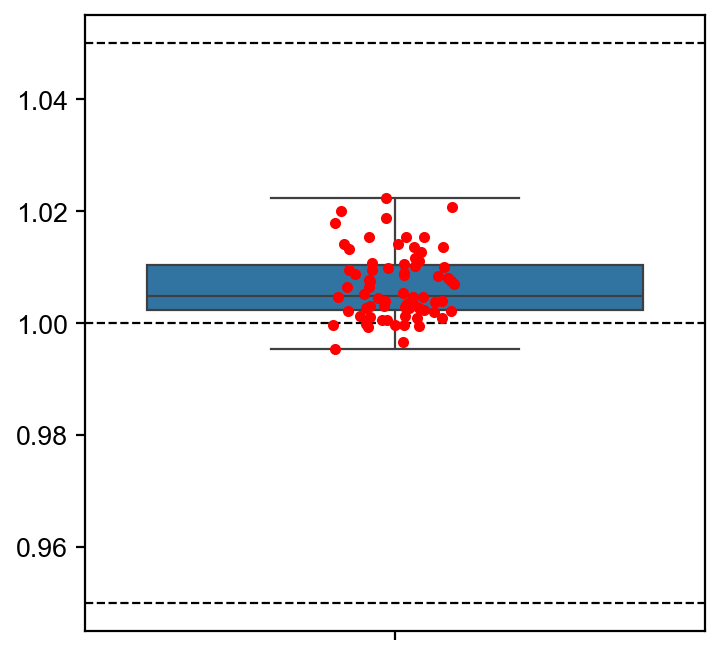

In [13]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(
    lie_factor_df,
    ax=ax,
    log_scale=False,
)
sns.stripplot(
    lie_factor_df,
    ax=ax,
    color='r',
)
ax.axhline(1, color='k', ls='--', lw=1)
ax.axhline(1.05, color='k', ls='--', lw=1)
ax.axhline(0.95, color='k', ls='--', lw=1)

(-5.0, 1.5)

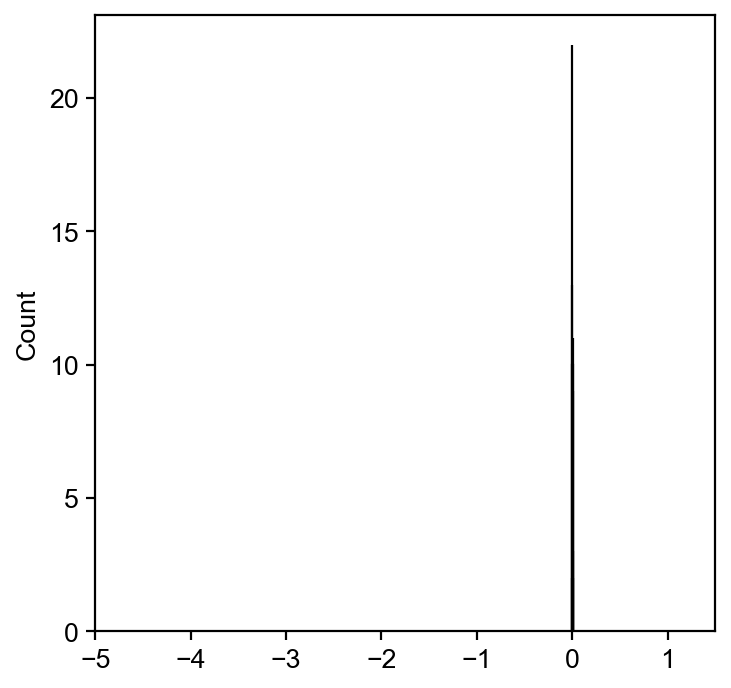

In [14]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(
    np.log10(lie_factor_df),
    ax=ax,
)
ax.set_xlim(-5, 1.5)

## Nature Biomedical Engineering

In [15]:
cv = lambda series: series.std() / series.mean()

## Graph annotations

In [1047]:
journals = [
    # 'acs_nano',
    'bioeng_transl_med',
    # 'cell',
    'nat_biomed_eng',
    'nat_biotechnol',
    'nat_cancer',
    'nat_cell_biol',
    'nat_nanotechnol',
    'nat_neurosci',
    'nat_plants',
    # 'nature',
    'sci_immunol',
    'sci_signal',
    'sci_transl_med',
    'science',
]
mistakes = [ZERO_SUBDIR, LOG_SUBDIR]
bar_annot_df_list = []
for journal in journals:
    mistake_bar_annot_df_list = []
    for mistake in mistakes:
        # EXTRACT FIGURE QUANTITY ANNOTATIONS
        # get filepaths of graph quantity annotation
        annot_df_ = pd.read_excel(os.path.join(f'data/misused_bar_graph_figures/{journal}/{mistake}', 'annotation.xlsx'), index_col=0)
        mistake_bar_annot_df_list.append(annot_df_)
    # construct journal-level annotation df
    journal_annot_df = pd.concat(mistake_bar_annot_df_list)
    bar_annot_df_list.append(journal_annot_df)
    
# construct overall df
bar_annot_df = pd.concat(bar_annot_df_list)
bar_annot_df

,DOI,Mistake,Fig ID,Journal,Quantity,Absolute/Relative,Measurement Type,Physical quantity I,Physical quantity II,Log transformation
Fig Index,,,,,,,,,,
10.1002:btm2.10499_zero_fig1,10.1002:btm2.10499,zero,1,bioeng_transl_med,TNF-alpha (pg/mL),Absolute,Measured value,Cytokine concentration,Concentration,No
10.1002:btm2.10499_zero_fig2,10.1002:btm2.10499,zero,2,bioeng_transl_med,MM-9 (pg/mL),Absolute,Measured value,Cytokine concentration,Concentration,No
10.1002:btm2.10499_zero_fig3,10.1002:btm2.10499,zero,3,bioeng_transl_med,IL-6 (pg/mL),Absolute,Measured value,Cytokine concentration,Concentration,No
10.1002:btm2.10499_zero_fig4,10.1002:btm2.10499,zero,4,bioeng_transl_med,TNF-alpha (pg/mL),Absolute,Measured value,Cytokine concentration,Concentration,No
10.1002:btm2.10499_zero_fig5,10.1002:btm2.10499,zero,5,bioeng_transl_med,SOD (U/mg protein),Absolute,Measured value,Concentration,Concentration,No
...,...,...,...,...,...,...,...,...,...,...
10.1126:science.adi2246_log_fig2,10.1126:science.adi2246,log,2,science,Relative fold change cs WT (normalized by GAPDH),Relative,Ratio,Ratio,Ratio,No
10.1126:science.adi2246_log_fig3,10.1126:science.adi2246,log,3,science,Relative gene expression (vs GAPDH),Relative,Ratio,Ratio,Ratio,No
10.1126:science.adi8885_log_fig1,10.1126:science.adi8885,log,1,science,KO/WT (log10),Relative,Ratio,Ratio,Ratio,10


In [1048]:
, 'Angle', 'Area', 'Energy', ,'', '', 'Rate', 'Volume'
bar_annot_df[bar_annot_df['Physical quantity I'].isin([
    'Modulus', 'Permeability', 'Permeance', 'Optical density', 'Rate'
       
])]

,DOI,Mistake,Fig ID,Journal,Quantity,Absolute/Relative,Measurement Type,Physical quantity I,Physical quantity II,Log transformation
Fig Index,,,,,,,,,,


In [1049]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().index

Index(['Bioluminescence', 'Concentration', 'Constant', 'Count', 'Fluorescence',
       'Length', 'Mass', 'Others', 'Percentage', 'Prediction metric', 'Ratio',
       'Statistics', 'Temperature', 'Time'],
      dtype='object', name='Physical quantity II')

In [1050]:
bar_annot_df[bar_annot_df['Physical quantity II'] == 'Constant'].groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count()

,DOI,Mistake,Fig ID
Physical quantity I,,,
Constant,9,9,9
Index,11,11,11


In [1051]:
for quant_idx in bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().index:
    print(bar_annot_df[bar_annot_df['Physical quantity II'] == quant_idx].groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count())

                       DOI  Mistake  Fig ID
Physical quantity I                        
Radiance                 2        2       2
Radiant efficiency       1        1       1
Radiant flux             5        5       5
Relative luminescence    8        8       8
                              DOI  Mistake  Fig ID
Physical quantity I                               
Characteristic concentration   10       10      10
Concentration                  26       26      26
Cytokine concentration         13       13      13
Titer                          14       14      14
                     DOI  Mistake  Fig ID
Physical quantity I                      
Constant               9        9       9
Index                 11       11      11
                     DOI  Mistake  Fig ID
Physical quantity I                      
Cell count            24       24      24
Colony count          11       11      11
Count                 41       41      41
                          DOI  Mistake  Fig ID
Physi

In [1052]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index()

,DOI,Mistake,Physical quantity I,Fig ID
0,10.1002:btm2.10487,log,Constant,2
1,10.1002:btm2.10499,zero,Concentration,1
2,10.1002:btm2.10499,zero,Cytokine concentration,5
3,10.1002:btm2.10504,zero,Relative luminescence,1
4,10.1002:btm2.10505,zero,Relative luminescence,2
...,...,...,...,...
512,10.1126:scitranslmed.adh4529,log,Count,1
513,10.1126:scitranslmed.adh7668,zero,Count,1
514,10.1126:scitranslmed.adi1617,log,Radiance,1
515,10.1126:scitranslmed.adi7244,zero,Cell percentage,3


In [1053]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count()

,DOI,Mistake,Fig ID
Physical quantity I,,,
AUC,5,5,5
Accuracy,7,7,7
Angle,3,3,3
Area,2,2,2
Cell count,24,24,24
Cell percentage,25,25,25
Cell viability,8,8,8
Characteristic concentration,10,10,10
Colon length,2,2,2


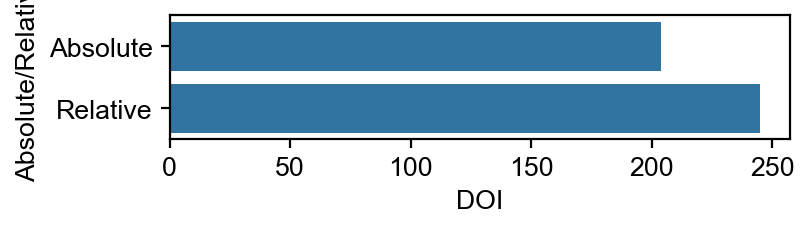

In [1054]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    data=bar_annot_df.groupby(['DOI', 'Mistake', 'Absolute/Relative']).count().iloc[:, 0].reset_index().groupby(['Absolute/Relative']).count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby(['DOI', 'Mistake', 'Absolute/Relative']).count().iloc[:, 0].reset_index().groupby(['Absolute/Relative']).count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(0.2)

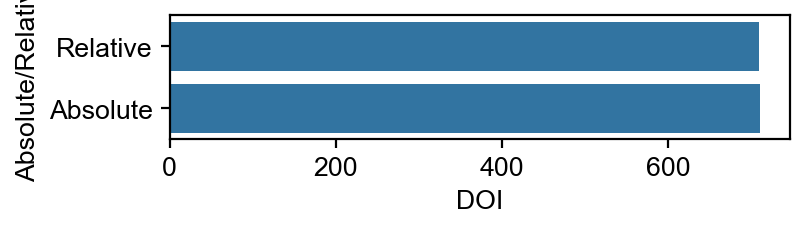

In [1055]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(
    data=bar_annot_df.groupby('Absolute/Relative').count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby('Absolute/Relative').count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(0.2)

In [1056]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().sum()

DOI        499
Mistake    499
Fig ID     499
dtype: int64

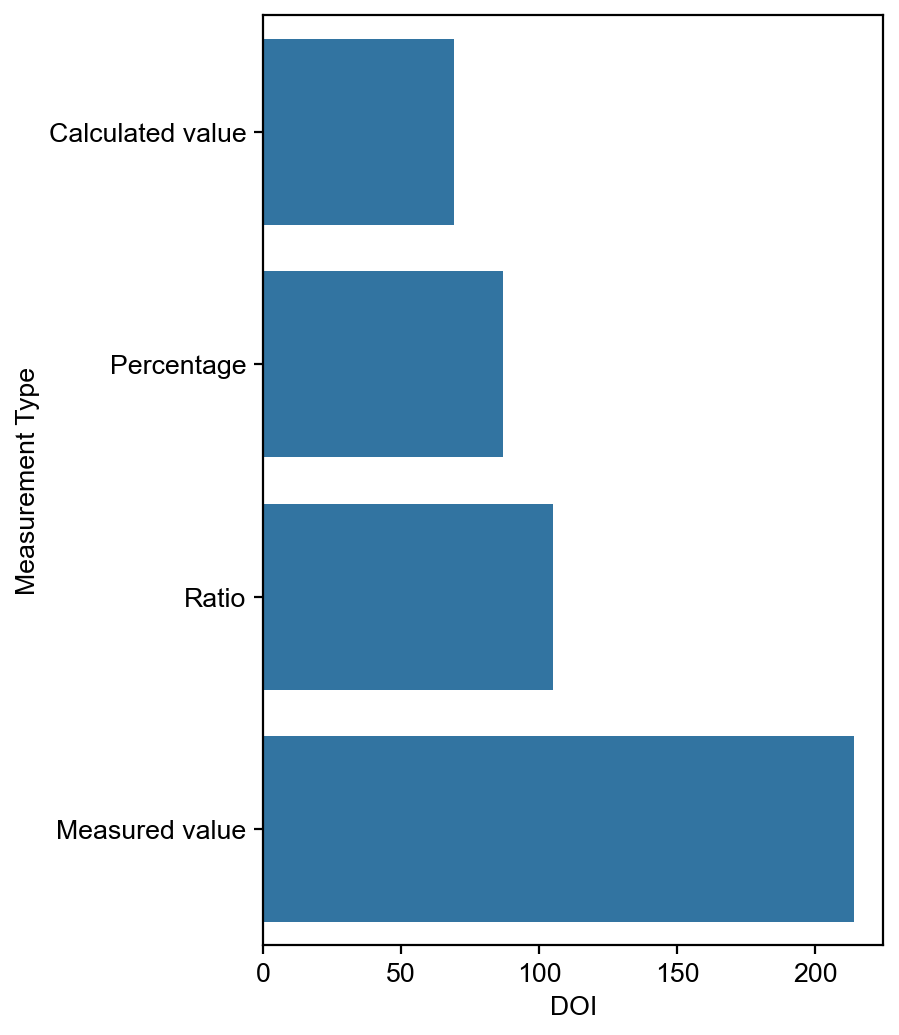

In [1057]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby(['DOI', 'Mistake', 'Measurement Type']).count().iloc[:, 0].reset_index().groupby(['Measurement Type']).count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby(['DOI', 'Mistake', 'Measurement Type']).count().iloc[:, 0].reset_index().groupby(['Measurement Type']).count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

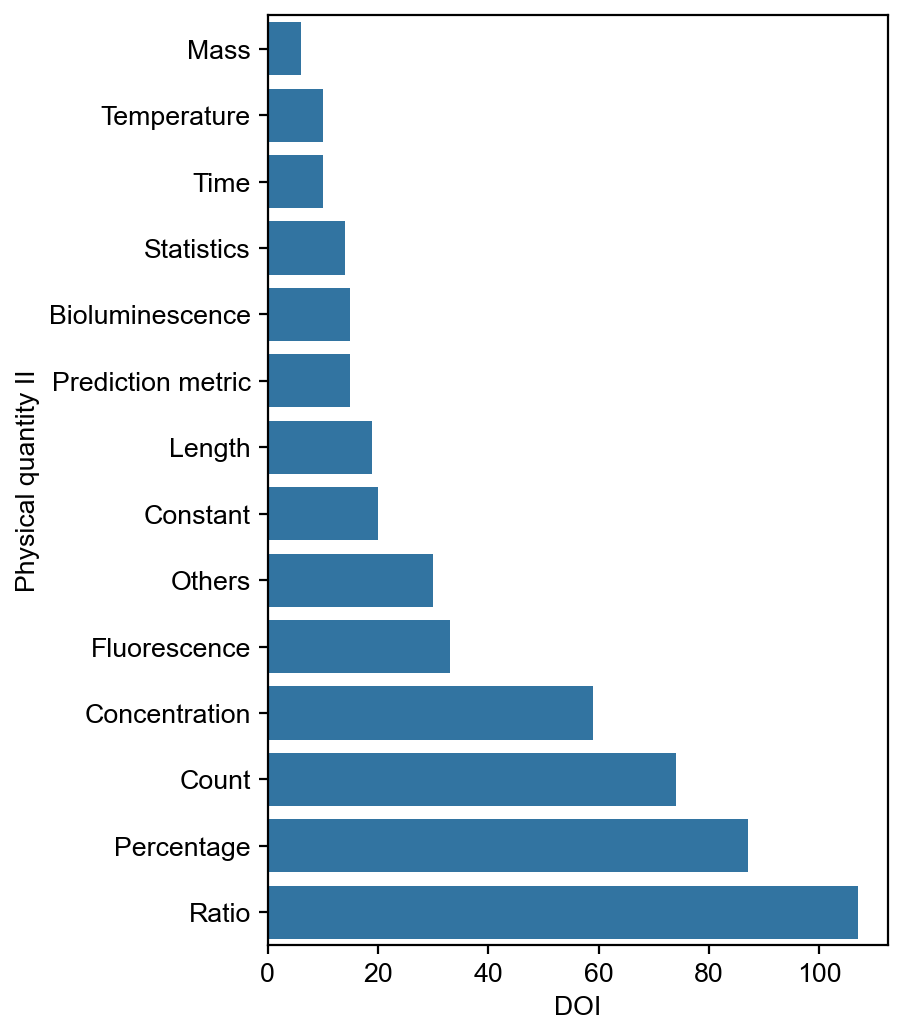

In [1058]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

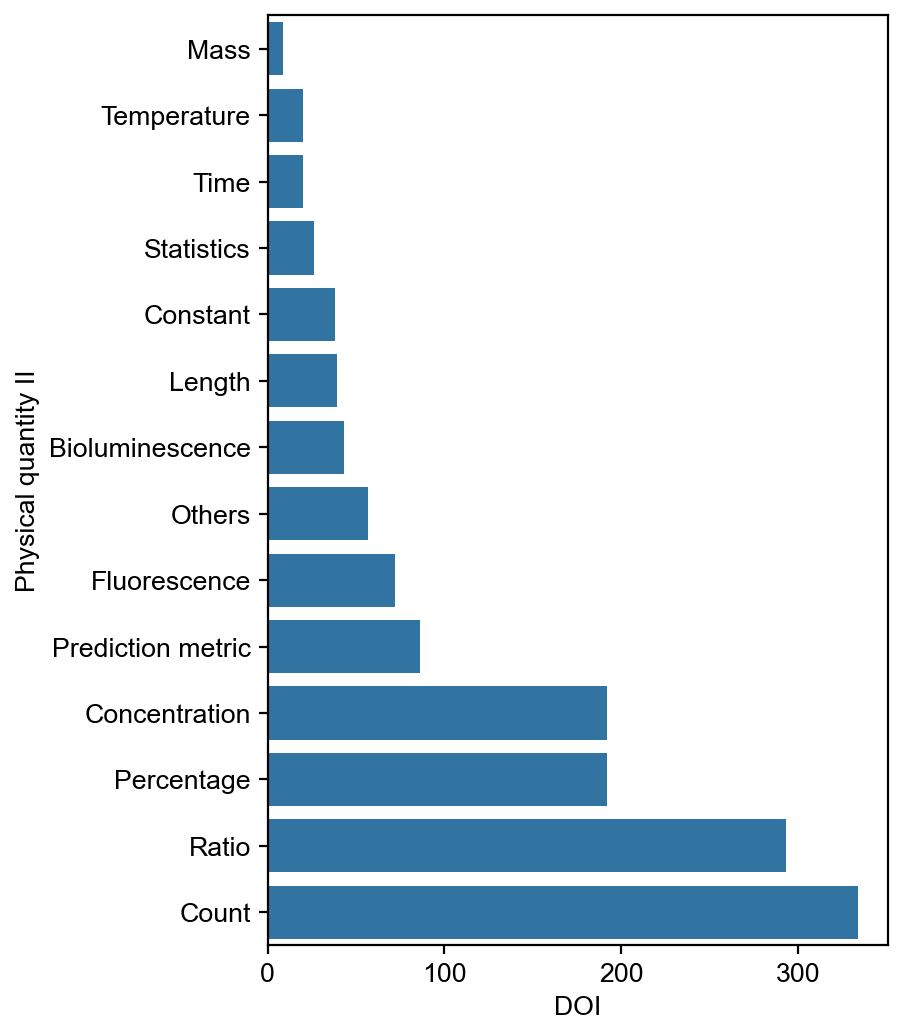

In [1059]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby('Physical quantity II').count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby('Physical quantity II').count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

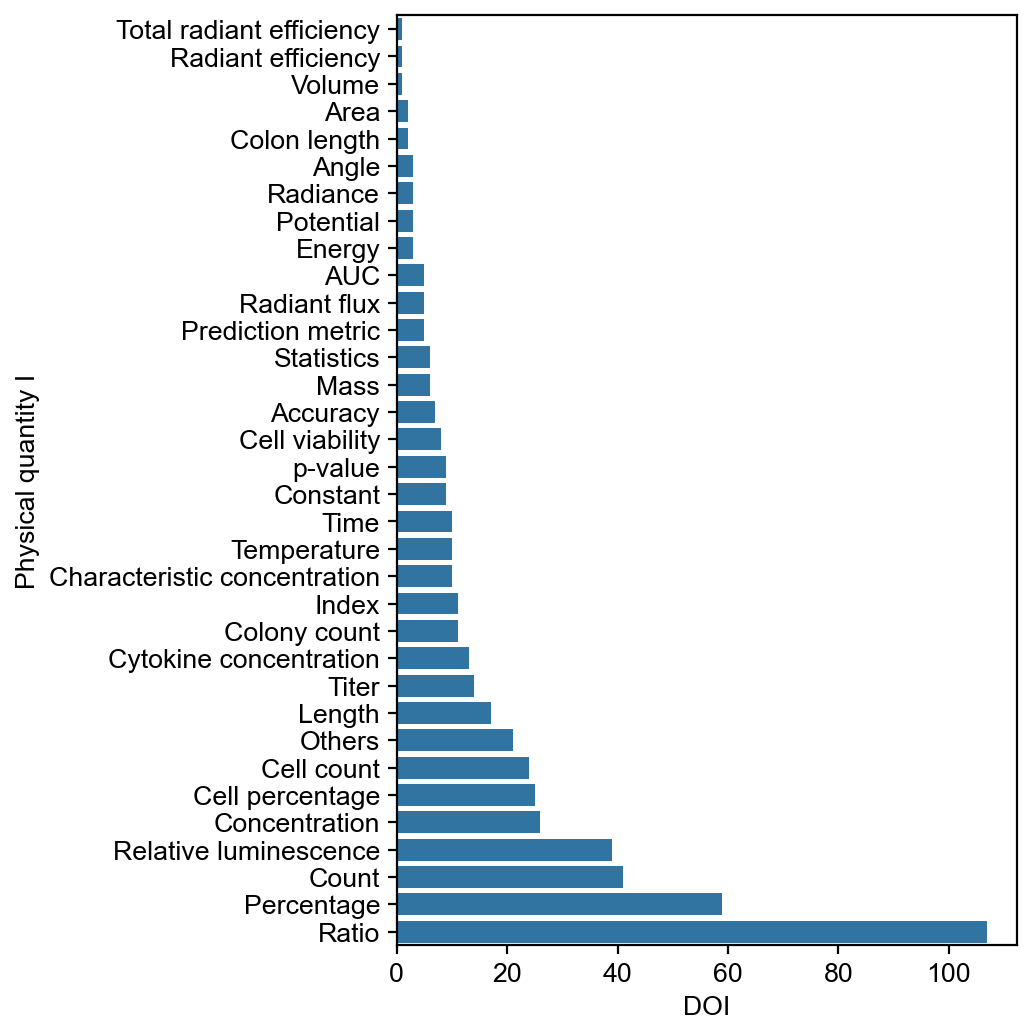

In [1060]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity I']).count().iloc[:, 0].reset_index().groupby(['Physical quantity I']).count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

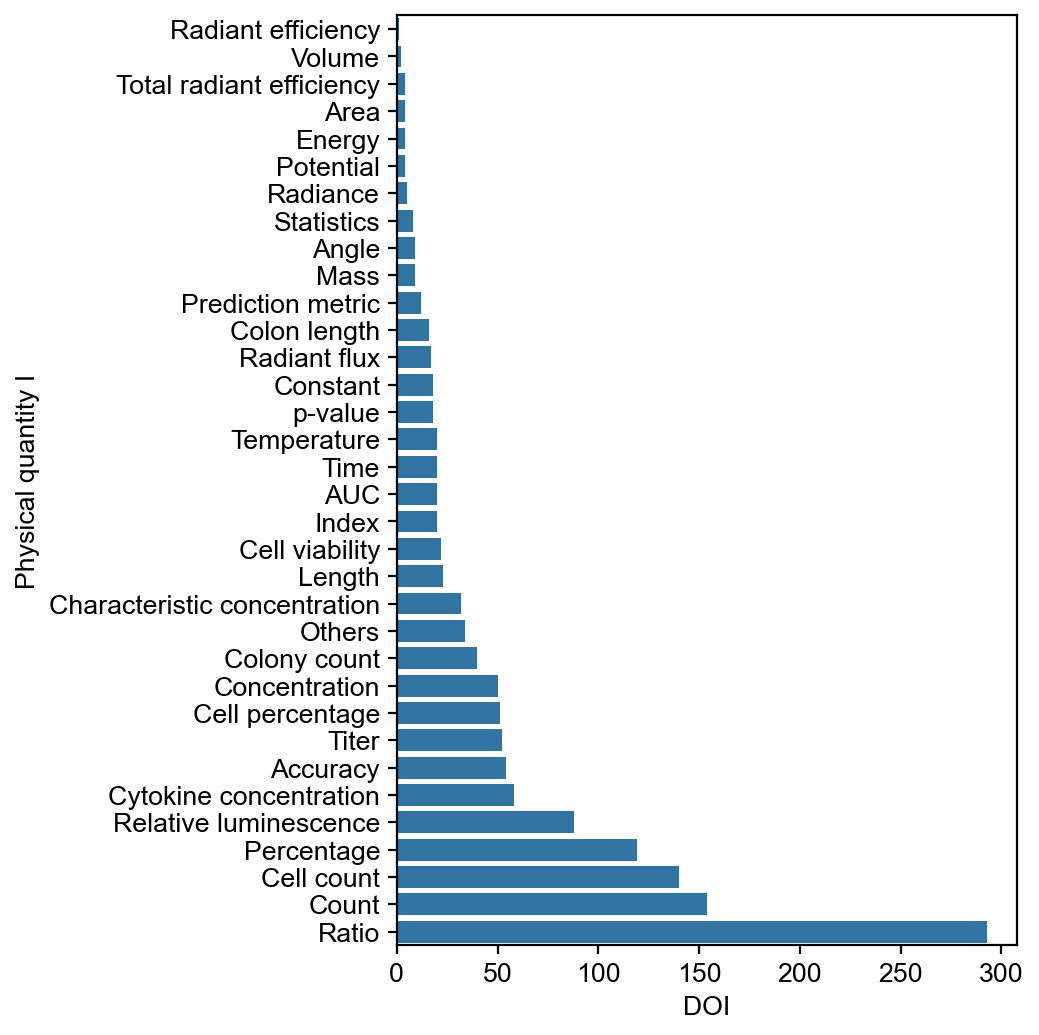

In [1061]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.barplot(
    data=bar_annot_df.groupby('Physical quantity I').count().iloc[:, 0],
    orient='h',
    order=bar_annot_df.groupby('Physical quantity I').count().iloc[:, 0].sort_values().index,
    ax=ax
)
ax.set_box_aspect(1.5)

In [1062]:
bar_annot_df[bar_annot_df['Physical quantity II'].isin(['Length'])].groupby('Physical quantity I').count()

,DOI,Mistake,Fig ID,Journal,Quantity,Absolute/Relative,Measurement Type,Physical quantity II,Log transformation
Physical quantity I,,,,,,,,,
Colon length,16,16,16,16,16,16,16,16,16
Length,23,23,23,23,23,23,23,23,23


In [1063]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Physical quantity II']).count()

,DOI,Mistake,Fig ID
Physical quantity II,,,
Bioluminescence,15,15,15
Concentration,59,59,59
Constant,20,20,20
Count,74,74,74
Fluorescence,33,33,33
Length,19,19,19
Mass,6,6,6
Others,30,30,30
Percentage,87,87,87


In [1064]:
bar_annot_df.groupby(['DOI', 'Mistake', 'Absolute/Relative']).count().iloc[:, 0].reset_index().groupby(['Absolute/Relative']).count()

,DOI,Mistake,Fig ID
Absolute/Relative,,,
Absolute,204,204,204
Relative,245,245,245


## Bar-level data

In [1065]:
X_LABEL = 'True Value'
Y_LABEL = 'Visualized Value'
ALPHA_MARK_LABEL = 'Mark Proportionality Constant'
ALPHA_DIFF_LABEL = 'Difference Proportionality Constant'

In [1066]:
journals = [
    # 'acs_nano',
    'bioeng_transl_med',
    # 'cell',
    'nat_biomed_eng',
    'nat_biotechnol',
    'nat_cancer',
    'nat_cell_biol',
    'nat_nanotechnol',
    'nat_neurosci',
    'nat_plants',
    # 'nature',
    'sci_immunol',
    'sci_signal',
    'sci_transl_med',
    'science',
]
mistakes = [ZERO_SUBDIR, LOG_SUBDIR]
value_labels = [VAL_LABEL, VIZ_LABEL]
value_label_labels = [X_LABEL, Y_LABEL]

zero_bar_df_list = []
log_bar_df_list = []
for journal in journals:
    mistake_zero_bar_df_list = []
    mistake_log_bar_df_list = []
    for mistake in mistakes:
        # EXTRACT TRUE AND VISUALIZED VALUES
        for j, value_label in enumerate(value_labels):
            # get filepaths of digitized values in csv
            filepath = os.path.join(DATA_DIR, MISUSED_BAR_DIR, journal, mistake)
            filenames = os.listdir(filepath)
            filenames = pd.Series(filenames)
            filenames = filenames[filenames.str.contains(CSV_FILEEXT) & filenames.str.contains(value_label)]
            filenames = filenames.reset_index(drop=True)
            fignames = filenames.str.slice(stop=-8)
            fig_fullids = fignames.str.replace('fig', '')
            filepaths = filepath + os.sep + filenames
            # read individual csv
            raw_df_dict = {}
            for i, filepath in enumerate(filepaths):
                bar_df_ = pd.read_csv(filepath, header=None, index_col=0)
                bar_df_ = bar_df_.reset_index(drop=True)
                # bar_df_.columns = [value_label]
                bar_df_.columns = [value_label_labels[j]]
                # # add metadata
                # doi, _, figid = fig_fullids[i].split('_')
                # bar_df_['Journal'] = journal
                # bar_df_['DOI'] = doi
                # bar_df_['Mistake'] = mistake
                # bar_df_['Fig ID'] = figid
                raw_df_dict[fignames[i]] = bar_df_
            
            # construct mistake-level df
            mistake_level_bar_df = pd.concat(raw_df_dict)
            if mistake == ZERO_SUBDIR:
                mistake_zero_bar_df_list.append(mistake_level_bar_df)
            elif mistake == LOG_SUBDIR:
                mistake_log_bar_df_list.append(mistake_level_bar_df)
            else:
                raise ValueError

    # construct journal-level bar df
    # zero
    journal_zero_bar_df = mistake_zero_bar_df_list[0].copy()
    journal_zero_bar_df[Y_LABEL] = mistake_zero_bar_df_list[1][Y_LABEL]
    journal_zero_bar_df[ALPHA_MARK_LABEL] = journal_zero_bar_df[Y_LABEL] / journal_zero_bar_df[X_LABEL]
    zero_bar_df_list.append(journal_zero_bar_df)
    # log
    journal_log_bar_df = mistake_log_bar_df_list[0].copy()
    journal_log_bar_df[Y_LABEL] = mistake_log_bar_df_list[1][Y_LABEL]
    journal_log_bar_df[ALPHA_MARK_LABEL] = journal_log_bar_df[Y_LABEL] / journal_log_bar_df[X_LABEL]
    log_bar_df_list.append(journal_log_bar_df)

# construct overall df
zero_bar_df = pd.concat(zero_bar_df_list)
log_bar_df = pd.concat(log_bar_df_list)
bar_df = pd.concat([zero_bar_df, log_bar_df])
bar_df

True Value  Visualized Value  \
10.1002:btm2.10552_zero_fig8     0  370.241692          0.234139   
                                 1  518.429003          0.728097   
10.1002:btm2.10517_zero_fig7     0    0.993023          0.741279   
                                 1    0.740698          0.425872   
10.1002:btm2.10609_zero_fig17    0    0.680180         -0.213213   
...                                        ...               ...   
10.1126:science.ade3483_log_fig1 0  593.139572          0.924386   
                                 1  507.112096          0.901701   
                                 2    7.768894          0.296786   
                                 3    6.061899          0.260870   
                                 4    4.489251          0.217391   

                                    Mark Proportionality Constant  
10.1002:btm2.10552_zero_fig8     0                       0.000632  
                                 1                       0.001404  
10.1002:btm2.10517_zero_fig7     0                       0.746487  
                                 1                       0.574961  
10.1002:btm2.10609_zero_fig17    0                      -0.313466  
...                                                           ...  
10.1126:science.ade3483_log_fig1 0                       0.001558  
                                 1                       0.001778  
                                 2                       0.038202  
                                 3                       0.043034  
                                 4                       0.048425  

[8791 rows x 3 columns]

## Pairwise permutation-level metric

In [1067]:
def perm_rel_change(df, label):
    perm_arr = itertools.permutations(df[label].reset_index(drop=True), 2)
    perm_arr = np.array(list(perm_arr))
    rel_change = (perm_arr[:, 1] - perm_arr[:, 0]) / perm_arr[:, 0]
    rel_change = pd.Series(rel_change)
    return pd.DataFrame(perm_arr), rel_change

In [1068]:
def perm_rel_change(df, label):
    perm_arr = itertools.permutations(df[label].reset_index(drop=True), 2)
    perm_arr = pd.DataFrame(np.array(list(perm_arr)))
    return perm_arr

In [1069]:
L_df_list = []
fig_id = np.unique(bar_df.index.get_level_values(0))
for i in range(len(fig_id)):
    df = bar_df[bar_df.index.get_level_values(0) == fig_id[i]]
    
    # generate permutations and their respective x, y values
    L_df_ = pd.concat(
        [
            perm_rel_change(df, X_LABEL), 
            perm_rel_change(df, Y_LABEL),
        ], 
        axis=1
    )
    L_df_.columns = ['x_1', 'x_2', 'y_1', 'y_2']

    # store bar id
    L_df_[['Bar 1 ID', 'Bar 2 ID']] = perm_rel_change(bar_df[bar_df.index.get_level_values(0) == fig_id[i]].reset_index(), 'level_1')
    
    # compute lie factor of relative change
    L_df_['E_x_12'] = (L_df_['x_1'] - L_df_['x_2']) / L_df_['x_2']
    L_df_['E_y_12'] = (L_df_['y_1'] - L_df_['y_2']) / L_df_['y_2']
    L_df_['L_12'] = L_df_['E_y_12'] / L_df_['E_x_12']
    L_df_['log L_12'] = np.log10(L_df_['L_12'])

    # compute GDI
    L_df_['GDI_12'] = 100 * (L_df_['L_12'] - 1)

    # compute lie factor of fold change
    L_df_['F_12'] = (L_df_['x_1'] / L_df_['x_2']) / (L_df_['y_1'] / L_df_['y_2'])
    L_df_['log F_12'] = np.log10(L_df_['F_12'])

    # compute RGD
    L_df_['RGD_12'] = L_df_['L_12'] - 1

    # add meta data
    # L_df_['Journal'] = df['Journal'][0]
    # L_df_['DOI'] = df['DOI'][0]
    # L_df_['Mistake'] = df['Mistake'][0]
    # L_df_['Fig ID'] = df['Fig ID'][0]
    L_df_['Fig Index'] = df.index.get_level_values(0)[0]
    
    # add quantity annotation
    # L_df_['Quantity'] = df['Quantity'][0]
    # L_df_['Absolute/Relative'] = df['Absolute/Relative'][0]
    # L_df_['Measurement Type'] = df['Measurement Type'][0]
    # L_df_['Physical quantity I'] = df['Physical quantity I'][0]
    # L_df_['Physical quantity II'] = df['Physical quantity II'][0]
    # L_df_['Log transformation'] = df['Log transformation'][0]
    
    L_df_list.append(L_df_)
L_df = pd.concat(L_df_list, ignore_index=True)
L_df = L_df.set_index('Fig Index')
# L_annotation_df = L_df[['Quantity', 'Absolute/Relative', 'Measurement Type', 'Physical quantity I', 'Physical quantity II', 'Log transformation']].copy()
# L_df = L_df.drop(['Quantity', 'Absolute/Relative', 'Measurement Type', 'Physical quantity I', 'Physical quantity II', 'Log transformation'], axis=1)
L_df

,x_1,x_2,y_1,y_2,Bar 1 ID,Bar 2 ID,E_x_12,E_y_12,L_12,log L_12,GDI_12,F_12,log F_12,RGD_12
Fig Index,,,,,,,,,,,,,,
10.1002:btm2.10487_log_fig1,0.941271,17.800504,0.352212,0.803540,0,1,-0.947121,-0.561674,0.593033,-0.226921,-40.696707,0.120638,-0.918515,-0.406967
10.1002:btm2.10487_log_fig1,0.941271,0.297195,0.352212,0.175221,0,2,2.167186,1.010101,0.466089,-0.331531,-53.391128,1.575635,0.197456,-0.533911
10.1002:btm2.10487_log_fig1,0.941271,3.977009,0.352212,0.573451,0,3,-0.763322,-0.385802,0.505426,-0.296343,-49.457437,0.385345,-0.414150,-0.494574
10.1002:btm2.10487_log_fig1,17.800504,0.941271,0.803540,0.352212,1,0,17.911138,1.281407,0.071542,-1.145436,-92.845753,8.289243,0.918515,-0.928458
10.1002:btm2.10487_log_fig1,17.800504,0.297195,0.803540,0.175221,1,2,58.895093,3.585859,0.060886,-1.215486,-93.911448,13.060824,1.115971,-0.939114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1126:scitranslmed.adi9867_log_fig2,1331.015174,786.004146,0.795732,0.742378,2,1,0.693395,0.071869,0.103647,-0.984441,-89.635255,1.579853,0.198617,-0.896353
10.1126:scitranslmed.adi9867_log_fig2,1331.015174,437.041699,0.795732,0.682927,2,3,2.045511,0.165179,0.080752,-1.092848,-91.924825,2.613772,0.417268,-0.919248
10.1126:scitranslmed.adi9867_log_fig2,437.041699,2504.337233,0.682927,0.859756,3,0,-0.825486,-0.205674,0.249155,-0.603531,-75.084527,0.219701,-0.658169,-0.750845


### Only median of each plot

- Bias in different number of bars
  - If include every point in each plot, graphs with more plots will have an advantage by pairwise permutation (n(n-1)).
  - Taking median of each plot?
- Bias in different number of plots for the same type of quantity
  - If include every similar plot, similar deviation is exaggerated
  - Taking median among all plots?
  - Do we have enough data point for journal level analysis?
- Put raw biased plots in supplemental information

In [1070]:
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Mistake']])
plot_df

,x_1,x_2,y_1,y_2,Bar 1 ID,Bar 2 ID,E_x_12,E_y_12,L_12,log L_12,GDI_12,F_12,log F_12,RGD_12,Absolute/Relative,Mistake
Fig Index,,,,,,,,,,,,,,,,
10.1002:btm2.10487_log_fig1,2.459140,2.459140,0.462832,0.462832,1.5,1.5,0.741462,0.057445,0.417407,-0.382415,-58.259341,1.105150,0.000000e+00,-0.582593,Absolute,log
10.1002:btm2.10487_log_fig2,6.461362,6.461362,0.448692,0.448692,1.5,1.5,0.859204,0.077444,0.427339,-0.374663,-57.266116,1.099787,0.000000e+00,-0.572661,Absolute,log
10.1002:btm2.10499_zero_fig1,23.125241,23.125241,0.366089,0.366089,3.5,3.5,0.000306,0.003109,4.692459,0.664729,369.245939,1.001392,3.295975e-17,3.692459,Absolute,zero
10.1002:btm2.10499_zero_fig2,17.704626,17.704626,0.423488,0.423488,3.0,3.0,0.000014,0.000021,1.393557,0.144125,39.355742,1.000001,1.114018e-17,0.393557,Absolute,zero
10.1002:btm2.10499_zero_fig3,13.212996,13.212996,0.328520,0.328520,3.0,3.0,0.000007,0.000020,1.608791,0.206500,60.879121,1.000003,-2.016616e-17,0.608791,Absolute,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1126:scitranslmed.adi7244_zero_fig1,48.135048,48.135048,0.604502,0.604502,0.5,0.5,0.013930,0.102449,2.738993,0.433283,173.899336,1.040072,-6.938894e-18,1.738993,Relative,zero
10.1126:scitranslmed.adi7244_zero_fig2,88.396694,88.396694,0.439669,0.439669,0.5,0.5,0.001313,0.722065,27.002885,1.370101,2600.288534,1.652451,5.551115e-17,26.002885,Relative,zero
10.1126:scitranslmed.adi7244_zero_fig3,68.875639,68.875639,0.471891,0.471891,0.5,0.5,0.028594,0.462064,4.260902,0.604216,326.090183,1.246988,-5.551115e-17,3.260902,Relative,zero


In [1071]:
import scipy
# absolute/relative
abs_cond = (plot_df['Absolute/Relative'] == 'Absolute')
rel_cond = (plot_df['Absolute/Relative'] == 'Relative')
# mistake: zero/log
log_cond = (plot_df['Mistake'] == 'log')
zero_cond = (plot_df['Mistake'] == 'zero')

In [1072]:
scipy.stats.mannwhitneyu(
    plot_df.loc[abs_cond & log_cond, 'log L_12'].dropna(),
    plot_df.loc[rel_cond & log_cond, 'log L_12'].dropna(),
)

MannwhitneyuResult(statistic=22406.0, pvalue=3.653796580400857e-15)

In [1073]:
scipy.stats.mannwhitneyu(
    plot_df.loc[abs_cond & zero_cond, 'log L_12'].dropna(),
    plot_df.loc[rel_cond & zero_cond, 'log L_12'].dropna(),
)

MannwhitneyuResult(statistic=41988.0, pvalue=1.2866305117440468e-11)

In [1074]:
scipy.stats.mannwhitneyu(
    plot_df.loc[abs_cond & log_cond, 'log F_12'].dropna(),
    plot_df.loc[rel_cond & log_cond, 'log F_12'].dropna(),
)

MannwhitneyuResult(statistic=39351.0, pvalue=1.0)

In [1075]:
scipy.stats.mannwhitneyu(
    plot_df.loc[abs_cond & zero_cond, 'log F_12'].dropna(),
    plot_df.loc[rel_cond & zero_cond, 'log F_12'].dropna(),
)

MannwhitneyuResult(statistic=60815.0, pvalue=0.646130488713025)

In [1076]:
result = scipy.stats.tukey_hsd(
    plot_df.loc[abs_cond & log_cond, 'log L_12'].dropna(),
    plot_df.loc[rel_cond & log_cond, 'log L_12'].dropna(),
    plot_df.loc[abs_cond & zero_cond, 'log L_12'].dropna(),
    plot_df.loc[rel_cond & zero_cond, 'log L_12'].dropna(),
)

In [1077]:
result.pvalue

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.67163808e-08],
       [0.00000000e+00, 0.00000000e+00, 3.67163808e-08, 1.00000000e+00]])

In [1078]:
bar_annot_df['Physical quantity II'][bar_annot_df['Physical quantity I'].isin(['Radiant flux'])]

Fig Index
10.1038:s41551-023-01143-w_log_fig3     Bioluminescence
10.1038:s41587-023-01774-z_log_fig13    Bioluminescence
10.1038:s43018-023-00563-6_log_fig1     Bioluminescence
10.1038:s43018-023-00563-6_log_fig10    Bioluminescence
10.1038:s43018-023-00563-6_log_fig11    Bioluminescence
10.1038:s43018-023-00563-6_log_fig2     Bioluminescence
10.1038:s43018-023-00563-6_log_fig3     Bioluminescence
10.1038:s43018-023-00563-6_log_fig4     Bioluminescence
10.1038:s43018-023-00563-6_log_fig5     Bioluminescence
10.1038:s43018-023-00563-6_log_fig6     Bioluminescence
10.1038:s43018-023-00563-6_log_fig7     Bioluminescence
10.1038:s43018-023-00563-6_log_fig8     Bioluminescence
10.1038:s43018-023-00563-6_log_fig9     Bioluminescence
10.1038:s41556-023-01273-y_log_fig1     Bioluminescence
10.1126:sciimmunol.add5204_log_fig1     Bioluminescence
10.1126:sciimmunol.add5204_log_fig2     Bioluminescence
10.1126:sciimmunol.add5204_log_fig3     Bioluminescence
Name: Physical quantity II, dtype: obj

In [1079]:
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df)

plot_df.groupby(['Mistake', 'Physical quantity II']).count()

x_1  x_2  y_1  y_2  Bar 1 ID  Bar 2 ID  E_x_12  \
Mistake Physical quantity II                                                   
log     Bioluminescence        36   36   36   36        36        36      36   
        Concentration         110  110  110  110       110       110     110   
        Constant               14   14   14   14        14        14      14   
        Count                 194  194  194  194       194       194     194   
        Fluorescence           33   33   33   33        33        33      33   
        Length                  1    1    1    1         1         1       1   
        Others                 19   19   19   19        19        19      19   
        Percentage             34   34   34   34        34        34      34   
        Ratio                 123  123  123  123       123       123     123   
        Statistics             21   21   21   21        21        21      21   
        Time                    2    2    2    2         2         2       2   
zero    Bioluminescence         3    3    3    3         3         3       3   
        Concentration          57   57   55   55        57        57      57   
        Constant               23   23   23   23        23        23      23   
        Count                 122  122  122  122       122       122     122   
        Fluorescence           37   37   37   37        37        37      37   
        Length                 38   38   38   38        38        38      38   
        Mass                    9    9    9    9         9         9       9   
        Others                 37   37   37   37        37        37      37   
        Percentage            127  127  127  127       127       127     127   
        Prediction metric      86   86   86   86        86        86      86   
        Ratio                 143  143  143  143       143       143     143   
        Statistics              4    4    4    4         4         4       4   
        Temperature            20   20   20   20        20        20      20   
        Time                   16   16   16   16        16        16      16   

                              E_y_12  L_12  log L_12  ...  log F_12  RGD_12  \
Mistake Physical quantity II                          ...                     
log     Bioluminescence           36    36        35  ...        36      36   
        Concentration            110   110       107  ...       110     110   
        Constant                  14    14        13  ...        14      14   
        Count                    194   194       194  ...       194     194   
        Fluorescence              33    33        33  ...        33      33   
        Length                     1     1         1  ...         1       1   
        Others                    19    19        19  ...        19      19   
        Percentage                34    34        34  ...        34      34   
        Ratio                    123   123       114  ...       119     123   
        Statistics                21    21         8  ...        21      21   
        Time                       2     2         2  ...         2       2   
zero    Bioluminescence            3     3         3  ...         3       3   
        Concentration             55    55        54  ...        55      55   
        Constant                  23    23        15  ...        23      23   
        Count                    122   122       121  ...       122     122   
        Fluorescence              37    37        37  ...        37      37   
        Length                    38    38        38  ...        38      38   
        Mass                       9     9         9  ...         9       9   
        Others                    37    37        36  ...        37      37   
        Percentage               127   127       127  ...       127     127   
        Prediction metric         86    86        86  ...        86      86   
        Ratio                    143   143       141

In [1080]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(plot_df.groupby(['Mistake', 'Physical quantity I']).count()['x_1'])

Mistake  Physical quantity I         
log      Area                              3
         Cell count                      105
         Cell percentage                  15
         Cell viability                    1
         Characteristic concentration     28
         Colony count                     28
         Concentration                    13
         Constant                          7
         Count                            61
         Cytokine concentration           36
         Energy                            1
         Index                             7
         Length                            1
         Others                           14
         Percentage                       18
         Potential                         1
         Radiance                          5
         Radiant efficiency                1
         Radiant flux                     17
         Ratio                           123
         Relative luminescence            42
         Statisti

In [1081]:
plot_df.groupby(['DOI', 'Mistake', 'Physical quantity II']).count().iloc[:, 0].reset_index().groupby(['Mistake', 'Physical quantity II']).count()

DOI  x_1
Mistake Physical quantity II          
log     Bioluminescence        12   12
        Concentration          34   34
        Constant                6    6
        Count                  49   49
        Fluorescence           12   12
        Length                  1    1
        Others                 11   11
        Percentage             18   18
        Ratio                  44   44
        Statistics              9    9
        Time                    1    1
zero    Bioluminescence         2    2
        Concentration          23   23
        Constant               14   14
        Count                  22   22
        Fluorescence           21   21
        Length                 18   18
        Mass                    6    6
        Others                 19   19
        Percentage             62   62
        Prediction metric      15   15
        Ratio                  58   58
        Statistics              4    4
        Temperature            10   10
        Time                    8    8

In [1082]:
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
plot_df

,Journal,DOI,Mistake,Physical quantity II,x_1,x_2,y_1,y_2,Bar 1 ID,Bar 2 ID,E_x_12,E_y_12,L_12,log L_12,GDI_12,F_12,log F_12,RGD_12
0,bioeng_transl_med,10.1002:btm2.10487,log,Constant,3.796009e+01,0.618609,0.722014,0.236486,1.0,2.00,17.305038,1.406094,0.110106,-0.999990,-88.989413,5.787905,0.725976,-0.889894
1,bioeng_transl_med,10.1002:btm2.10499,zero,Concentration,2.603343e+01,17.145656,0.647791,0.292155,2.5,4.00,0.382221,0.593059,1.893072,0.275030,89.307243,0.861458,-0.064777,0.893072
2,bioeng_transl_med,10.1002:btm2.10504,zero,Fluorescence,8.566285e+00,7.990180,0.641571,0.497545,1.0,3.00,0.054012,0.210526,4.014803,0.603664,301.480263,0.869405,-0.060778,3.014803
3,bioeng_transl_med,10.1002:btm2.10505,zero,Fluorescence,8.223640e+00,7.390640,0.703940,0.565107,4.0,4.75,0.075033,0.159576,2.212943,0.343176,121.294280,0.931512,-0.031335,1.212943
4,bioeng_transl_med,10.1002:btm2.10514,log,Concentration,1.265511e+06,1995.156604,0.632623,0.067299,2.5,2.50,27.965237,5.129227,0.135706,-1.144604,-86.429436,13.876111,0.870191,-0.864294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,science,10.1126:science.adi4720,zero,Temperature,7.202300e+01,68.937198,0.801533,0.386712,2.5,1.00,0.033757,0.776572,17.524751,1.243470,1652.475136,0.601741,-0.220716,16.524751
475,science,10.1126:science.adi8885,log,Ratio,1.213554e+00,0.741725,0.083935,-0.234274,0.0,1.00,1.608392,-0.471876,2.514590,0.731242,151.458985,-15.140926,-0.060626,1.514590
476,science,10.1126:science.adi8885,zero,Count,8.608350e+00,6.798058,0.690909,0.495396,0.0,1.00,0.221012,0.346734,1.789877,0.252823,78.987730,0.889580,-0.050815,0.789877
477,science,10.1126:science.adi8885,zero,Percentage,7.618255e+01,52.688033,0.769709,0.378134,1.0,0.00,0.418345,1.991251,3.196228,0.439864,219.622776,0.679365,-0.219349,2.196228


In [1083]:
plot_df.groupby(['Mistake', 'Physical quantity II']).count()

Journal  DOI  x_1  x_2  y_1  y_2  Bar 1 ID  \
Mistake Physical quantity II                                               
log     Bioluminescence            12   12   12   12   12   12        12   
        Concentration              34   34   34   34   34   34        34   
        Constant                    6    6    6    6    6    6         6   
        Count                      49   49   49   49   49   49        49   
        Fluorescence               12   12   12   12   12   12        12   
        Length                      1    1    1    1    1    1         1   
        Others                     11   11   11   11   11   11        11   
        Percentage                 18   18   18   18   18   18        18   
        Ratio                      44   44   44   44   44   44        44   
        Statistics                  9    9    9    9    9    9         9   
        Time                        1    1    1    1    1    1         1   
zero    Bioluminescence             2    2    2    2    2    2         2   
        Concentration              23   23   23   23   22   22        23   
        Constant                   14   14   14   14   14   14        14   
        Count                      22   22   22   22   22   22        22   
        Fluorescence               21   21   21   21   21   21        21   
        Length                     18   18   18   18   18   18        18   
        Mass                        6    6    6    6    6    6         6   
        Others                     19   19   19   19   19   19        19   
        Percentage                 62   62   62   62   62   62        62   
        Prediction metric          15   15   15   15   15   15        15   
        Ratio                      58   58   58   58   58   58        58   
        Statistics                  4    4    4    4    4    4         4   
        Temperature                10   10   10   10   10   10        10   
        Time                        8    8    8    8    8    8         8   

                              Bar 2 ID  E_x_12  E_y_12  L_12  log L_12  \
Mistake Physical quantity II                                             
log     Bioluminescence             12      12      12    12        12   
        Concentration               34      34      34    34        33   
        Constant                     6       6       6     6         6   
        Count                       49      49      49    49        49   
        Fluorescence                12      12      12    12        12   
        Length                       1       1       1     1         1   
        Others                      11      11      11    11        11   
        Percentage                  18      18      18    18        18   
        Ratio                       44      44      44    44        42   
        Statistics                   9       9       9     9         3   
        Time                         1       1       1     1         1   
zero    Bioluminescence              2       2       2     2         2   
        Concentration               23      23      22    22        22   
        Constant                    14      14      14    14        11   
        Count                       22      22      22    22        21   
        Fluorescence                21      21      21    21        21   
        Length                      18      18      18    18        18   
        Mass                         6       6       6     6         6   
        Others                      19      19      19    19        19   
        Percentage                  62      62      62    62        62   
        Prediction metric           15      15      15    15        15   
        Ratio                       58      58      58    58        57   
        Statistics                   4       4       4     4         4   
        Temperature                 10      10      10    10        10   
        Time                         8       8       

(480, 19)
(480, 19)


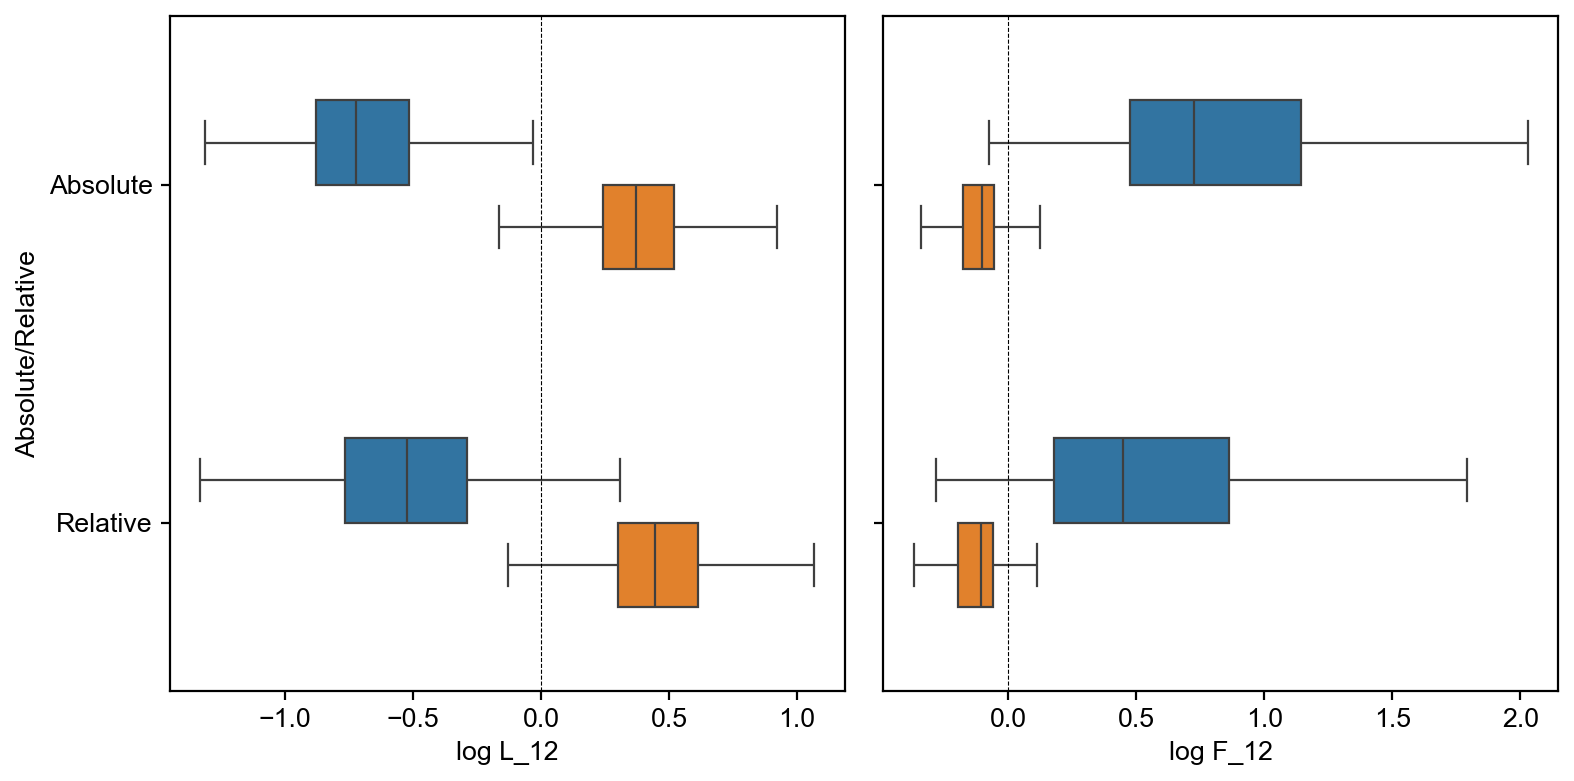

In [1084]:
row = 1
col = 2
scale = 3
fig, axs = plt.subplots(row, col, figsize=(10, 5), sharey=True)
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log L_12',
    y='Absolute/Relative',
    hue='Mistake', 
    ax=axs[0],
    width=0.5,
    legend=False,
    showfliers=False,
    order=np.unique(plot_df['Absolute/Relative']),
)
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log F_12', 
    y='Absolute/Relative',
    hue='Mistake', 
    ax=axs[1],
    width=0.5,
    legend=False,
    showfliers=False,
    order=np.unique(plot_df['Absolute/Relative']),
)
for i in range(col):
    axs[i].axvline(0, color='k', ls='--', lw=0.5, zorder=999)
    axs[i].set_box_aspect(1)
plt.tight_layout()

(480, 19)
(480, 19)


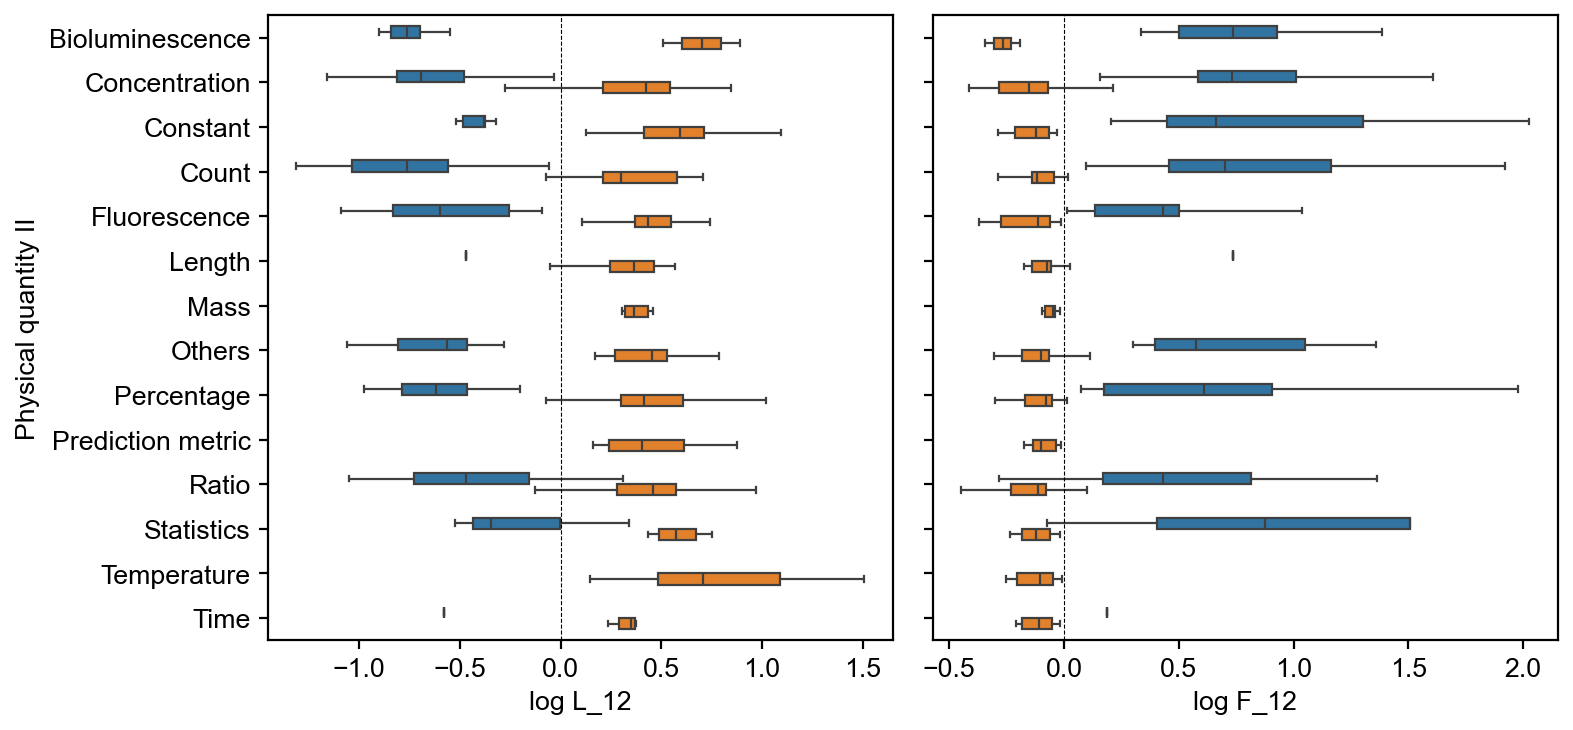

In [1085]:
row = 1
col = 2
scale = 3
fig, axs = plt.subplots(row, col, figsize=(10, 5), sharey=True)
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log L_12',
    y='Physical quantity II',
    hue='Mistake', 
    ax=axs[0],
    width=0.5,
    legend=False,
    showfliers=False,
    order=np.unique(plot_df['Physical quantity II']),
)
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity II']).median().reset_index()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log F_12', 
    y='Physical quantity II',
    hue='Mistake', 
    ax=axs[1],
    width=0.5,
    legend=False,
    showfliers=False,
    order=np.unique(plot_df['Physical quantity II']),
)
for i in range(col):
    axs[i].axvline(0, color='k', ls='--', lw=0.5, zorder=999)
    axs[i].set_box_aspect(1)
plt.tight_layout()

(497, 19)
(497, 19)


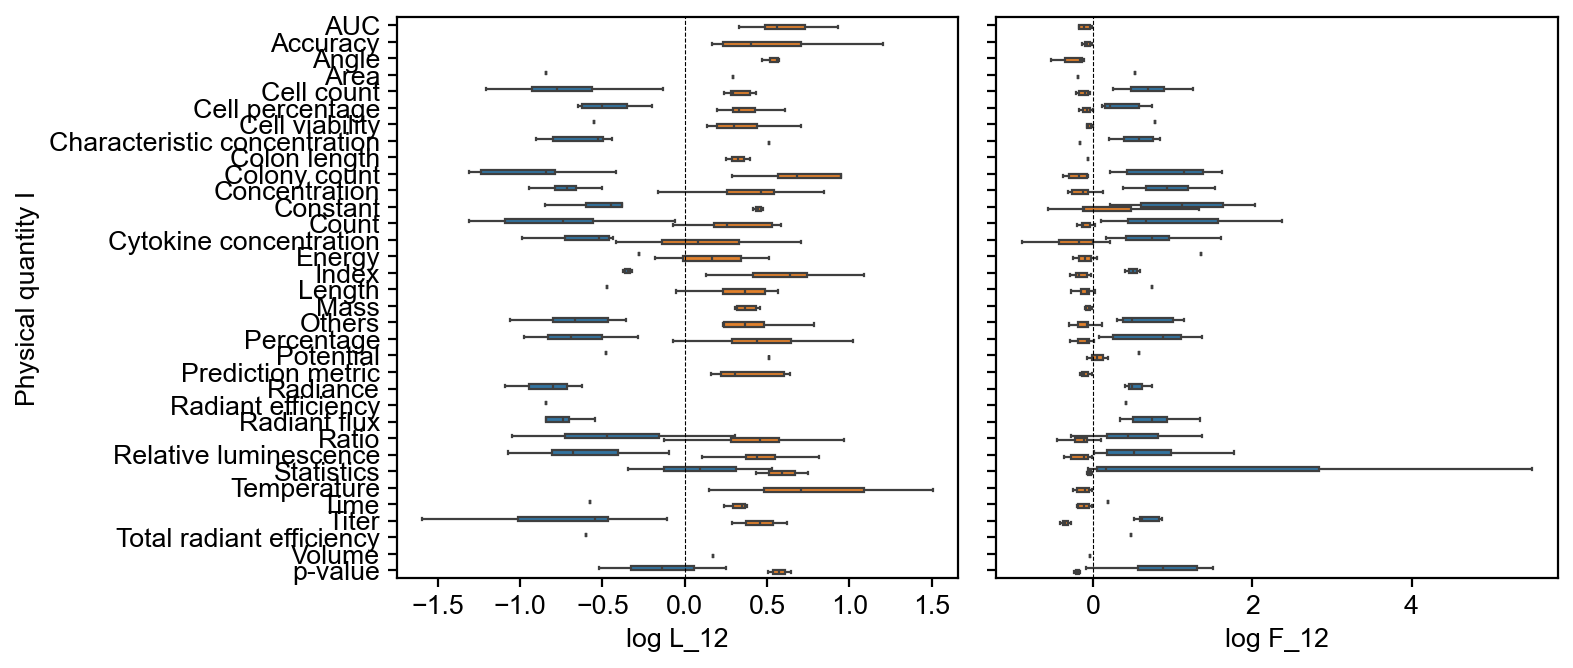

In [1086]:
row = 1
col = 2
scale = 3
fig, axs = plt.subplots(row, col, figsize=(10, 5), sharey=True)
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']).median().reset_index()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log L_12',
    y='Physical quantity I',
    hue='Mistake', 
    ax=axs[0],
    width=0.5,
    legend=False,
    showfliers=False,
    order=np.unique(plot_df['Physical quantity I']),
)
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']).median().reset_index()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log F_12', 
    y='Physical quantity I',
    hue='Mistake', 
    ax=axs[1],
    width=0.5,
    legend=False,
    showfliers=False,
    order=np.unique(plot_df['Physical quantity I']),
)
for i in range(col):
    axs[i].axvline(0, color='k', ls='--', lw=0.5, zorder=999)
    axs[i].set_box_aspect(1)
plt.tight_layout()

In [1087]:
plot_df = L_df.groupby(L_df.index).median()
plot_df = plot_df.join(bar_annot_df[['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']])
plot_df = plot_df.groupby(['Absolute/Relative', 'Journal', 'DOI', 'Mistake', 'Physical quantity I']).median().reset_index()
plot_df

,Absolute/Relative,Journal,DOI,Mistake,Physical quantity I,x_1,x_2,y_1,y_2,Bar 1 ID,Bar 2 ID,E_x_12,E_y_12,L_12,log L_12,GDI_12,F_12,log F_12,RGD_12
0,Absolute,bioeng_transl_med,10.1002:btm2.10487,log,Constant,4.460251,4.460251,0.455762,0.455762,1.5,1.5,0.800333,0.067445,0.422373,-0.378539,-57.762729,1.102468,0.000000e+00,-0.577627
1,Absolute,bioeng_transl_med,10.1002:btm2.10499,zero,Concentration,156.422018,156.422018,0.532110,0.532110,3.0,3.0,0.000010,0.000019,1.469828,0.167266,46.982759,1.000002,5.713745e-17,0.469828
2,Absolute,bioeng_transl_med,10.1002:btm2.10499,zero,Cytokine concentration,17.704626,17.704626,0.370642,0.370642,3.0,3.0,0.000056,0.000094,1.608791,0.206500,60.879121,1.000005,1.114018e-17,0.608791
3,Absolute,bioeng_transl_med,10.1002:btm2.10514,log,Titer,233048.919125,233048.919125,0.441974,0.441974,2.5,2.5,0.015453,0.000691,0.372999,-0.479547,-62.700103,1.002623,-7.806256e-18,-0.627001
4,Absolute,bioeng_transl_med,10.1002:btm2.10517,zero,Concentration,23.339518,23.339518,0.417440,0.417440,1.0,1.0,0.000016,0.000833,6.988889,0.844408,598.888889,1.000615,-2.862294e-17,5.988889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Relative,science,10.1126:science.adi4720,zero,Temperature,69.854545,69.854545,0.516103,0.516103,1.5,1.5,0.000006,0.001398,14.197232,1.143459,1319.723191,1.001163,0.000000e+00,13.197232
493,Relative,science,10.1126:science.adi8885,log,Ratio,0.977640,0.977640,-0.075170,-0.075170,0.5,0.5,0.605445,-2.388438,5.204803,0.873244,420.480335,-7.291036,-1.040834e-17,4.204803
494,Relative,science,10.1126:science.adi8885,zero,Cell percentage,55.325132,55.325132,0.588752,0.588752,0.5,0.5,0.000116,0.000285,1.566250,0.194857,56.624988,1.000037,-3.361027e-17,0.566250
495,Relative,science,10.1126:science.adi8885,zero,Percentage,91.927273,91.927273,0.865455,0.865455,1.0,1.0,0.001239,0.003742,1.770308,0.248049,77.030812,1.000674,1.040834e-17,0.770308


(497, 14)
(497, 14)


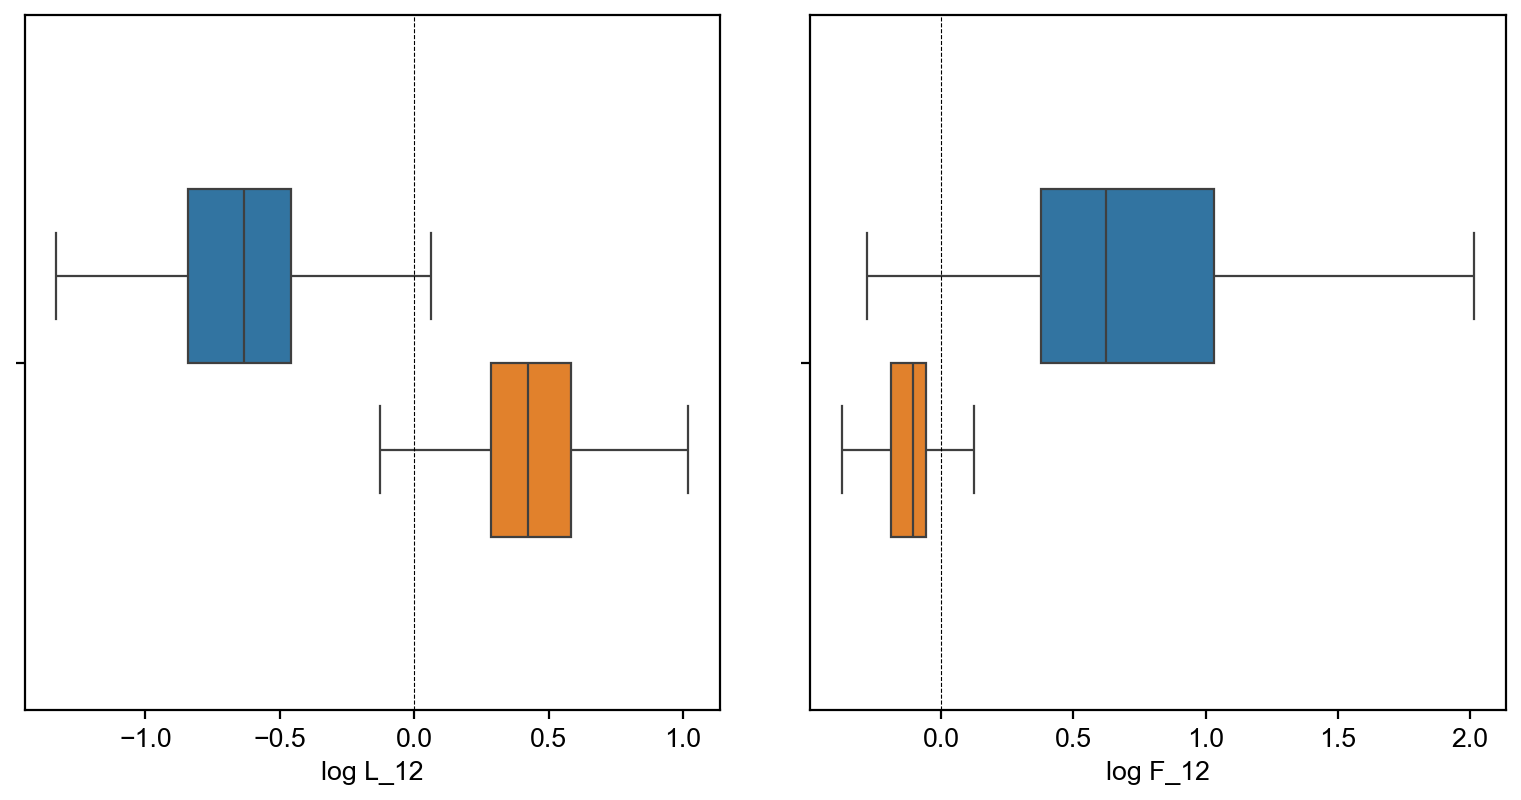

In [1088]:
row = 1
col = 2
scale = 3
fig, axs = plt.subplots(row, col, figsize=(10, 5), sharey=True)
# eliminate bar-level bias by groupby graphs
plot_df = L_df.groupby(L_df.index).median()
# tag on text properties
plot_df = plot_df.join(bar_annot_df[['Journal', 'DOI', 'Mistake', 'Physical quantity I']])
# eliminate graph-level bias by groupby physical quantities
plot_df = plot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity I']).median()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log L_12',
    hue='Mistake', 
    ax=axs[0],
    width=0.5,
    legend=False,
    showfliers=False,
)
# eliminate bar-level bias by groupby graphs
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
# tag on text properties
plot_df = plot_df.join(bar_annot_df[['Journal', 'DOI', 'Mistake', 'Physical quantity I']])  
# eliminate graph-level bias by groupby physical quantities
plot_df = plot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity I']).median()
print(plot_df.shape)
sns.boxplot(
    plot_df,
    x='log F_12', 
    hue='Mistake', 
    ax=axs[1],
    width=0.5,
    legend=False,
    showfliers=False,
)
for i in range(col):
    axs[i].axvline(0, color='k', ls='--', lw=0.5, zorder=999)
    axs[i].set_box_aspect(1)
plt.tight_layout()

(497, 14)
(497, 14)


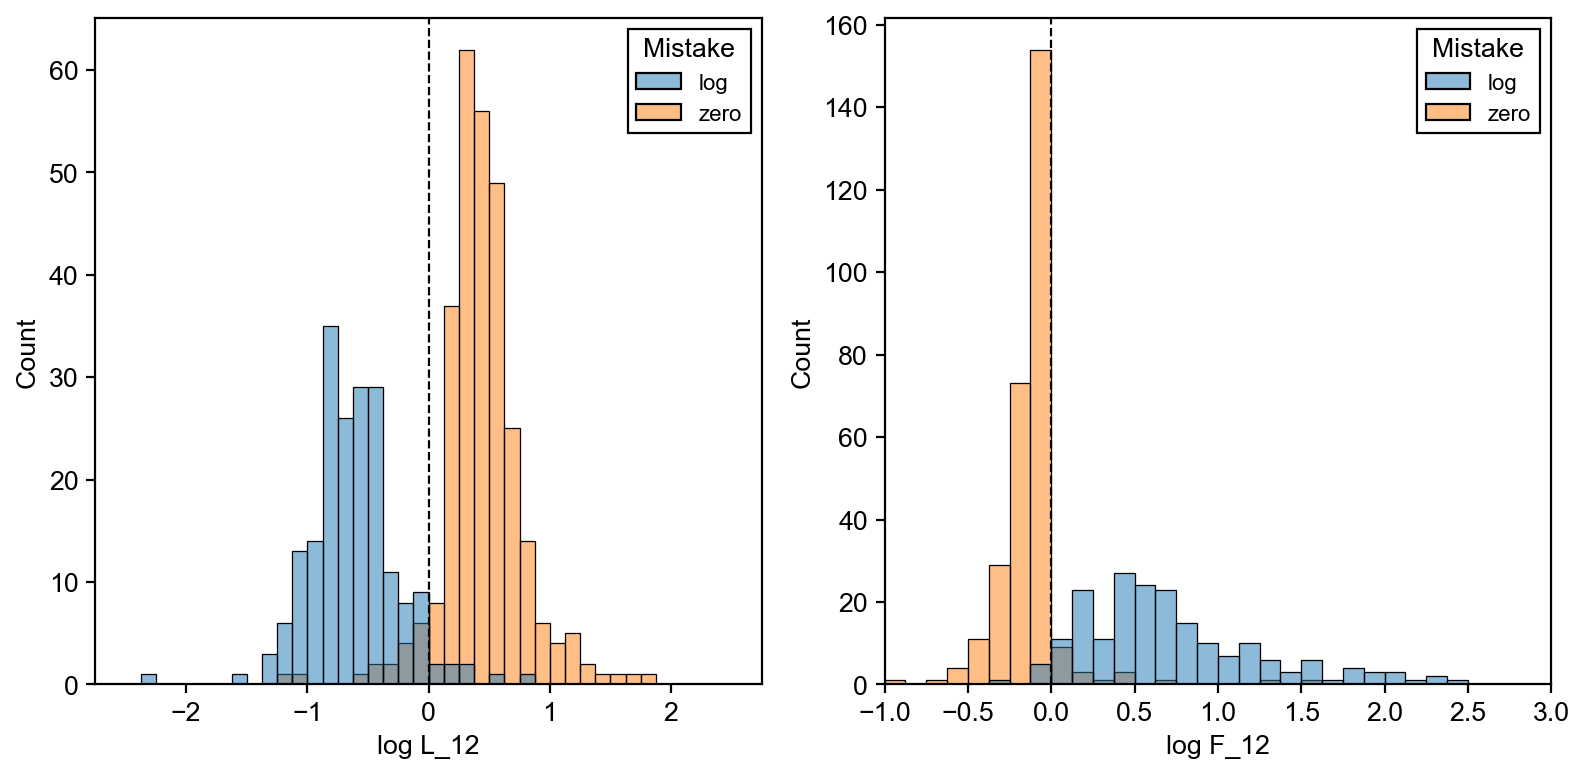

In [1089]:
bins = np.arange(-2.5, 2.5 + 0.125, 0.125)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# eliminate bar-level bias by groupby graphs
plot_df = L_df.groupby(L_df.index).median()
# tag on text properties
plot_df = plot_df.join(bar_annot_df[['Journal', 'DOI', 'Mistake', 'Physical quantity I']])
# eliminate graph-level bias by groupby physical quantities
plot_df = plot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity I']).median()
print(plot_df.shape)
sns.histplot(
    plot_df,
    x='log L_12', 
    hue='Mistake', 
    # kde=True,
    bins=bins,
    ax=axs[0],
)
# eliminate bar-level bias by groupby graphs
plot_df = L_df[L_df['x_1'] > L_df['x_2']].groupby(L_df[L_df['x_1'] > L_df['x_2']].index).median()
# tag on text properties
plot_df = plot_df.join(bar_annot_df[['Journal', 'DOI', 'Mistake', 'Physical quantity I']])  
# eliminate graph-level bias by groupby physical quantities
plot_df = plot_df.groupby(['Journal', 'DOI', 'Mistake', 'Physical quantity I']).median()
print(plot_df.shape)
sns.histplot(
    plot_df,
    x='log F_12', 
    hue='Mistake', 
    # kde=True,
    bins=bins,
    ax=axs[1],
)
axs[1].set_xlim(-1, 3)
for i in range(2):
    axs[i].set_box_aspect(1)
    axs[i].axvline(0, color='k', lw=1, ls='--')
plt.tight_layout()

## Graph-level metric

In [1090]:
grouped_alpha = (bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0))
grouped_alpha_inverse = (1 / bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0))

In [1091]:
cv_df = grouped_alpha.std() / grouped_alpha.mean()
cv_df = cv_df.to_frame()
cv_df.columns = ['CV alpha_i']
cv_df['log CV alpha_i'] = np.log10(cv_df['CV alpha_i'])

cv_df['CV alpha_i inverse'] = grouped_alpha_inverse.std() / grouped_alpha_inverse.mean()
cv_df['log CV alpha_i inverse'] = np.log10(cv_df['CV alpha_i inverse'])

cv_df['Mean CV alpha_i'] = (cv_df['CV alpha_i'] + cv_df['CV alpha_i inverse']) / 2
cv_df['log Mean CV alpha_i'] = np.log10(cv_df['Mean CV alpha_i'])

cv_df['IQR over median alpha_i'] = (grouped_alpha.quantile(0.75) - grouped_alpha.quantile(0.25)) / grouped_alpha.median()
cv_df['log IQR over median alpha_i'] = np.log10(cv_df['IQR over median alpha_i'])

cv_df['IQR over median alpha_i inverse'] = (grouped_alpha_inverse.quantile(0.75) - grouped_alpha_inverse.quantile(0.25)) / grouped_alpha_inverse.median()
cv_df['log IQR over median alpha_i inverse'] = np.log10(cv_df['IQR over median alpha_i inverse'])

cv_df['Mean IQR over median alpha_i'] = (cv_df['IQR over median alpha_i'] + cv_df['IQR over median alpha_i inverse']) / 2
cv_df['log Mean IQR over median alpha_i'] = np.log10(cv_df['Mean IQR over median alpha_i'])

cv_df['MAD alpha_i'] = grouped_alpha.agg(lambda pop: np.median(np.abs(pop - np.median(pop)))) / grouped_alpha.median()
cv_df['log MAD alpha_i'] = np.log10(cv_df['MAD alpha_i'])

cv_df['MAD alpha_i inverse'] = grouped_alpha_inverse.agg(lambda pop: np.median(np.abs(pop - np.median(pop)))) / grouped_alpha_inverse.median()
cv_df['log MAD alpha_i inverse'] = np.log10(cv_df['MAD alpha_i inverse'])

cv_df['Mean MAD alpha_i'] = (cv_df['MAD alpha_i'] + cv_df['MAD alpha_i inverse']) / 2
cv_df['log Mean MAD alpha_i'] = np.log10(cv_df['Mean MAD alpha_i'])

# cv_df = pd.DataFrame(np.abs(np.log10(bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0)).std() / np.log10(bar_df[ALPHA_MARK_LABEL]).groupby(bar_df.index.get_level_values(0)).mean()))

# tag meta data
cv_df['Mistake'] = bar_df.groupby(bar_df.index.get_level_values(0))['Mistake'].unique().str.get(0)
cv_df

KeyError: 'Column not found: Mistake'

ValueError: Could not interpret value `Mistake` for `hue`. An entry with this name does not appear in `data`.

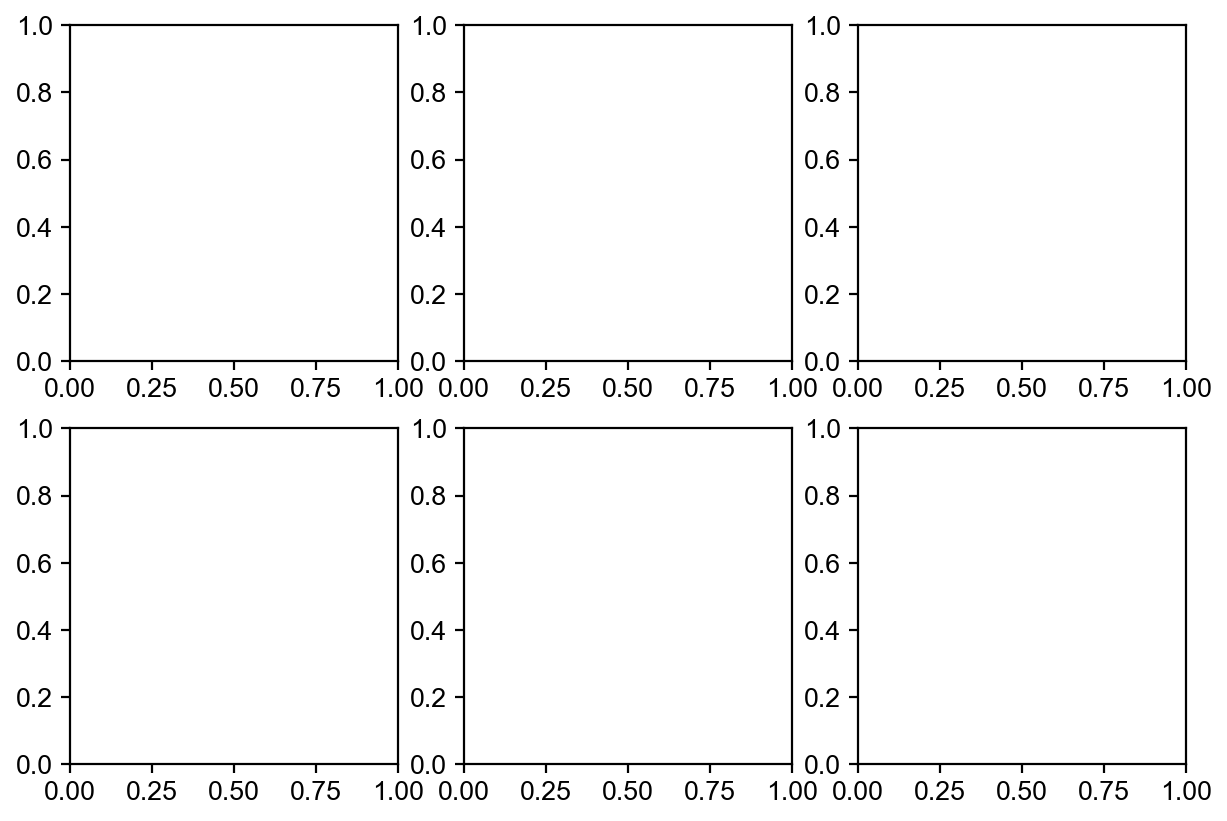

In [1092]:
property_list = [
    'CV alpha_i',
    # 'CV alpha_i inverse',
    # 'Mean CV alpha_i',
    'IQR over median alpha_i',
    # 'IQR over median alpha_i inverse',
    # 'Mean IQR over median alpha_i',
    'MAD alpha_i',
    # 'MAD alpha_i inverse',
    # 'Mean MAD alpha_i',
]
row = 2
col = len(property_list)
scale = 3
fig, axs = plt.subplots(row, col, figsize=(col*scale, row*scale))
for col_i in range(col):
    sns.histplot(
        cv_df[cv_df['CV alpha_i'] > 0],
        x=property_list[col_i],
        hue='Mistake',
        bins=40,
        kde=True,
        # bins=np.linspace(-3.5, 3.5, 29),
        ax=axs[0, col_i],
    )
    sns.histplot(
        cv_df[cv_df['CV alpha_i'] > 0],
        x=f'log {property_list[col_i]}',
        hue='Mistake',
        bins=40,
        kde=True,
        # bins=np.linspace(-3.5, 3.5, 29),
        ax=axs[1, col_i],
    )
for col_i in range(col):
    for row_i in range(row):
        axs[row_i, col_i].set_box_aspect(1)
plt.tight_layout(pad=0.2)